In [1]:
!pip install pandas numpy scikit-learn seaborn matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

data = pd.DataFrame({
    'area': [
        1000, 1500, 1800, 2400, 3000, 1100, 1400, 1600, 2000, 2200,
        1250, 1700, 1900, 2100, 2800, 1350, 1450, 1550, 1650, 1750,
        1850, 1950, 2050, 2150, 2250, 2300, 2400, 2500, 2600, 2700
    ],
    'bedrooms': [
        2, 3, 3, 4, 5, 2, 3, 3, 4, 4,
        2, 3, 4, 4, 5, 2, 3, 3, 3, 4,
        3, 4, 4, 4, 5, 5, 4, 4, 5, 5
    ],
    'location': [
        'Pune', 'Mumbai', 'Delhi', 'Pune', 'Mumbai', 'Delhi', 'Hyderabad', 'Bangalore', 'Mumbai', 'Bangalore',
        'Hyderabad', 'Delhi', 'Pune', 'Mumbai', 'Bangalore', 'Hyderabad', 'Pune', 'Delhi', 'Mumbai', 'Hyderabad',
        'Bangalore', 'Pune', 'Mumbai', 'Delhi', 'Bangalore', 'Pune', 'Hyderabad', 'Delhi', 'Mumbai', 'Bangalore'
    ],
    'price': [
        50, 80, 90, 120, 150, 55, 75, 100, 140, 135,
        70, 95, 115, 145, 160, 65, 85, 88, 105, 110,
        108, 119, 138, 99, 128, 118, 132, 102, 142, 150
    ]  # in Lakhs
})


In [7]:
data.head()

,area,bedrooms,location,price
0,1000,2,Pune,50
1,1500,3,Mumbai,80
2,1800,3,Delhi,90
3,2400,4,Pune,120
4,3000,5,Mumbai,150


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      30 non-null     int64 
 1   bedrooms  30 non-null     int64 
 2   location  30 non-null     object
 3   price     30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None


In [10]:
data.describe()

,area,bedrooms,price
count,30.000000,30.000000,30.000000
mean,1941.666667,3.633333,108.966667
std,512.109116,0.964305,29.784841
min,1000.000000,2.000000,50.000000
25%,1562.500000,3.000000,88.500000
50%,1925.000000,4.000000,109.000000
75%,2287.500000,4.000000,134.250000
max,3000.000000,5.000000,160.000000


In [11]:
data.isnull().sum()

area        0
bedrooms    0
location    0
price       0
dtype: int64

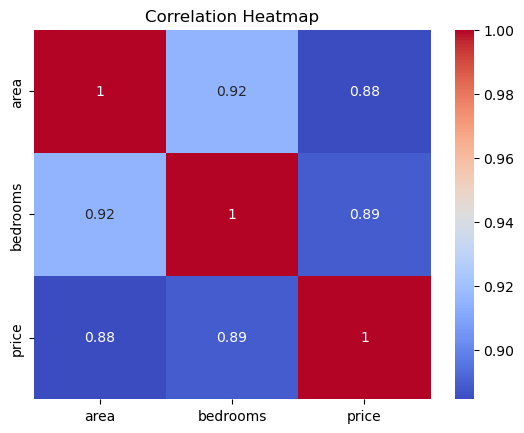

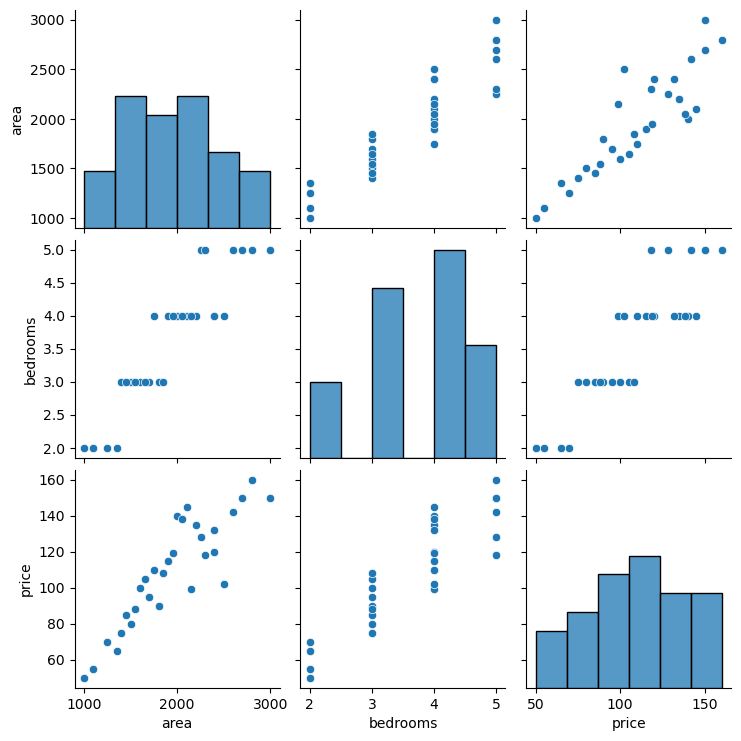

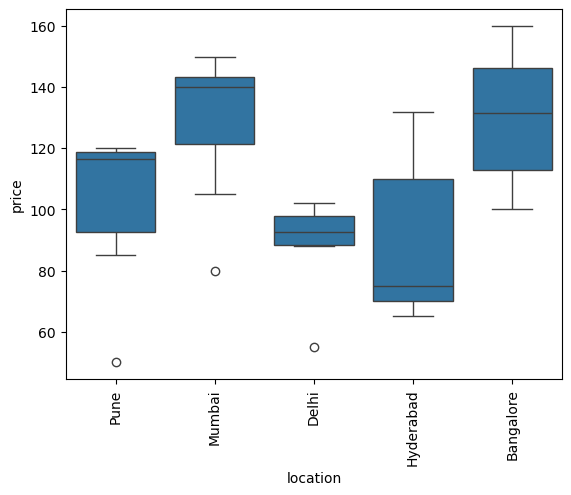

In [16]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(data)
plt.show()

sns.boxplot(x='location', y='price', data=data)
plt.xticks(rotation=90)
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
data['location_encoded'] = le.fit_transform(data['location'])


In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [27]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_location = ohe.fit_transform(data[['location']])
encoded_df = pd.DataFrame(encoded_location, columns=ohe.get_feature_names_out(['location']))


In [29]:
# Drop original 'location' and join one-hot encoded location
df_final = pd.concat([data.drop(['location'], axis=1), encoded_df], axis=1)

# Correlation with target
correlation = df_final.corr()
important_features = correlation['price'].sort_values(ascending=False)
print("Feature Importance:\n", important_features)

# Let's use all features except 'price'
X = df_final.drop('price', axis=1)
y = df_final['price']


Feature Importance:
 price                 1.000000
bedrooms              0.889192
area                  0.884709
location_Mumbai       0.369329
location_encoded     -0.068642
location_Pune        -0.133178
location_Hyderabad   -0.283541
location_Delhi       -0.355140
Name: price, dtype: float64


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
y_train

28    142
24    128
12    115
0      50
4     150
16     85
5      55
13    145
11     95
22    138
1      80
2      90
25    118
3     120
21    119
26    132
18    105
29    150
20    108
7     100
10     70
14    160
19    110
6      75
Name: price, dtype: int64

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [36]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [37]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))
print("Decision Tree R2 Score:", r2_score(y_test, y_pred_dt))

print("Linear MSE:", mean_squared_error(y_test, y_pred_lr))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))


Linear Regression R2 Score: 0.7014280479856769
Decision Tree R2 Score: 0.4663491150987559
Linear MSE: 201.97563187235588
Decision Tree MSE: 361.0
